In [62]:
# імпорт бібліотек
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
import sqlite3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# зчитування файла с даними та збереження в df
salary = pd.read_csv('drive/MyDrive/ДЗ Python_07/data/jobs_in_data_2024.csv')

In [4]:
    # опис даних
# work_year: Рік, в якому записані дані
# experience_level: Рівень професійного досвіду співробітника - Entry-level, Executive, Mid-level, Senior
# employment_type: тип занятості
# job_title: Назву посади - наприклад «Data Scientist», «Data Engineer» або «Data Analyst»
# salary: Річна валова зарплата посади в валюті
# salary_currency: Валюта, в якій виплачується зарплата
# salary_in_usd: Річна валова зарплата, конвертована в доллари США (USD)
# employee_residence: Країна проживання співробітника
# work_setting: робоча обстановка
# company_location: Країна, в якій знаходиться компанія
# company_size: Розмір компанії-роботодавця
# job_category: Класифікація посади

In [5]:
# виведення датафрейму salary
salary.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
5,2024,Mid-level,Full-time,Data Science,46203,GBP,57753,United Kingdom,In-person,United Kingdom,M,Data Science and Research
6,2024,Mid-level,Full-time,Data Science,38280,GBP,47850,United Kingdom,In-person,United Kingdom,M,Data Science and Research
7,2024,Entry-level,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering


In [6]:
# огляд датафрейму salary
salary.info(), salary.shape
print(salary.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB
           work_year experience_level employment_type      job_title  \
count   14199.000000            14199           14199          14199   
unique           NaN     

In [7]:
# DataFrame містить 14199 записів і 12 стовпців, усі з яких повністю заповнені. Mаємо числові та текстові дані (типи int64  та object),
# а пам’ять, яку займає цей DataFrame, становить приблизно 1.3 MB
# дані виглядають організованими для аналізу, а результати розподілу показують основні статистичні характеристики кожного стовпця.

In [8]:
# перевірка на нульові значення
print(salary.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64


In [9]:
# df salary не має нульових значень

In [10]:
# перевірка чи всі дані у SQL-таблиці відносяться до 2024 року
connection = sqlite3.connect('database.db')
salary.to_sql('dataset_salary', connection, if_exists='replace', index=False)
cursor = connection.cursor()
query_2 = """
    SELECT CAST(work_year AS TEXT) AS work_year, COUNT(*) AS record_count
    FROM dataset_salary
    GROUP BY work_year

    UNION ALL

    SELECT 'Всего' AS work_year, COUNT(*) AS record_count
    FROM dataset_salary;
"""
cursor.execute(query_2)
for row in cursor:
    print(f"Year: {row[0]}, Кількість записів: {row[1]}")
cursor.close()
connection.close()

Year: 2020, Кількість записів: 71
Year: 2021, Кількість записів: 197
Year: 2022, Кількість записів: 1635
Year: 2023, Кількість записів: 8485
Year: 2024, Кількість записів: 3811
Year: Всего, Кількість записів: 14199


In [11]:
# перевірка чи є від'ємні дані по зарплаті в SQL-таблиці
connection = sqlite3.connect('database.db')
salary.to_sql('dataset_salary', connection, if_exists='replace', index=False)
cursor = connection.cursor()
query_3 = """
    SELECT *
    FROM dataset_salary
    WHERE salary < 0 OR salary_in_usd  < 0;
"""
cursor.execute(query_3)
found_negative = False
for row in cursor:
    found_negative = True
    print(f"Від'ємна зарплата: {row}")

if not found_negative:
    print("Немає записів із від'ємною зарплатою.")
cursor.close()
connection.close()

Немає записів із від'ємною зарплатою.


In [12]:
# визначаємо скільки унікальних значень в колонках
connection = sqlite3.connect('database.db')
columns = [
    "experience_level",
    "employment_type",
    "job_title",
    "employee_residence",
    "work_setting",
    "company_location",
    "company_size",
    "job_category"
]
unique_values = {}
cursor = connection.cursor()
for column in columns:
    query = f"SELECT DISTINCT {column} FROM dataset_salary;"
    cursor.execute(query)
    unique_values[column] = [row[0] for row in cursor.fetchall()]
df_unique = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))
print(df_unique.nunique())
cursor.close()
connection.close()

experience_level        4
employment_type         4
job_title             149
employee_residence     86
work_setting            3
company_location       74
company_size            3
job_category           10
dtype: int64


In [13]:
salary['job_title'].value_counts()

,count
job_title,
Data Engineer,3059
Data Scientist,2910
Data Analyst,2120
Machine Learning Engineer,1488
Research Scientist,454
...,...
Data Analytics Associate,1
Analytics Engineering Manager,1
Sales Data Analyst,1


In [15]:
# визначаємо які унікальні значеня в колонках
connection = sqlite3.connect('database.db')
columns = [
    "experience_level",
    "employment_type",
    "job_title",
    "employee_residence",
    "work_setting",
    "company_location",
    "company_size",
    "job_category"
]
unique_values = {}
cursor = connection.cursor()
for column in columns:
    query = f"SELECT DISTINCT {column} FROM dataset_salary;"
    cursor.execute(query)
    unique_values[column] = [row[0] for row in cursor.fetchall()]
cursor.close()
connection.close()
df_unique = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in unique_values.items()]))
print(df_unique)
connection.close()

    experience_level employment_type                job_title  \
0        Entry-level       Freelance   Applied Data Scientist   
1          Executive       Full-time    Business Intelligence   
2             Senior        Contract           Data Architect   
3          Mid-level       Part-time             Data Science   
4                NaN             NaN          Insight Analyst   
..               ...             ...                      ...   
144              NaN             NaN   Marketing Data Analyst   
145              NaN             NaN  Data Analytics Engineer   
146              NaN             NaN     Cloud Data Architect   
147              NaN             NaN       Lead Data Engineer   
148              NaN             NaN   Principal Data Analyst   

    employee_residence work_setting company_location company_size  \
0       United Kingdom       Remote   United Kingdom            M   
1        United States    In-person    United States            S   
2           

<ipython-input-82-32cea7892e7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='work_year', y='count', data=data_work, palette='coolwarm')


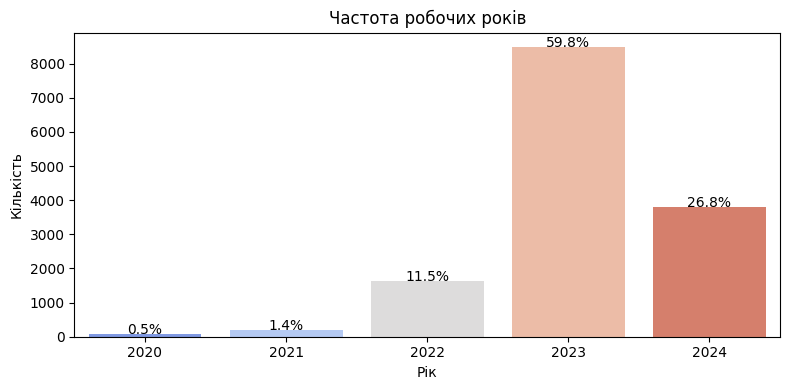

In [82]:
# Розрахунок частоти та пропорцій для "work_year"
data_work = salary['work_year'].value_counts().sort_index().reset_index()
data_work.columns = ['work_year', 'count']
data_work['proportion (%)'] = (data_work['count'] / len(salary) * 100).round(1)
plt.figure(figsize=(8, 4))
sns.barplot(x='work_year', y='count', data=data_work, palette='coolwarm')
plt.title('Частота робочих років')
plt.xlabel('Рік')
plt.ylabel('Кількість');
for index, row in data_work.iterrows():
    plt.text(x=index, y=row['count'] + 1, s=f"{row['proportion (%)']}%", ha='center', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
# ця вибірка показує, що даних більше за 2020-2024 роки

In [21]:
# АНАЛИЗ
# 1 Загальний аналіз зарплати та аналіз зарплати по рокам

In [20]:
# группування даних за назвою роботи job_title і обчислення середньої зарплати salary_in_usd для кожної групи
salary.groupby('job_title')['salary_in_usd'].mean().reset_index()

,job_title,salary_in_usd
0,AI Architect,229721.130435
1,AI Developer,135466.789474
2,AI Engineer,164044.612903
3,AI Product Manager,141766.666667
4,AI Programmer,62347.833333
...,...,...
144,Sales Data Analyst,60000.000000
145,Software Data Engineer,111627.666667
146,Staff Data Analyst,79917.000000
147,Staff Data Scientist,134500.000000


Experience Level: Entry-level, Average Salary: 91714.18, Max Salary: 350000
Experience Level: Executive, Average Salary: 191625.69, Max Salary: 448000
Experience Level: Mid-level, Average Salary: 122982.93, Max Salary: 450000
Experience Level: Senior, Average Salary: 162948.43, Max Salary: 450000


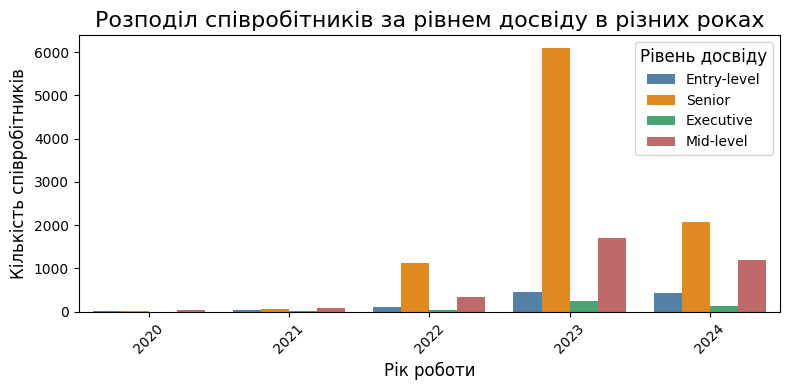

In [22]:
# групування даних за рівнем досвіду та обчислення середньої та максимальної зарплати
connection = sqlite3.connect('database.db')
cursor = connection.cursor()
query_4 = """
    SELECT experience_level, AVG(salary) AS avg_salary, MAX(salary) AS max_salary
    FROM dataset_salary
    GROUP BY experience_level;
"""
cursor.execute(query_4)
for row in cursor:
    print(f"Experience Level: {row[0]}, Average Salary: {row[1]:.2f}, Max Salary: {row[2]}")
experience_level_colors = ["steelblue", "darkorange", "mediumseagreen", "indianred"]
plt.figure(figsize=(8, 4))
sns.countplot(x='work_year', hue='experience_level', data=salary, palette=experience_level_colors)
plt.title('Розподіл співробітників за рівнем досвіду в різних роках', fontsize=16)
plt.xlabel('Рік роботи', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Рівень досвіду", title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()
connection.close()

In [ ]:
# Початківці Entry-level отримують досить конкурентні зарплати, але їхній максимальний потенціал значно нижчий порівняно з іншими рівнями досвіду.
# Executive цей рівень має найвищі середні показники, що логічно через більшу відповідальність і стратегічний вплив у компаніях.
# Mid-level - cередній рівень показує збалансовані зарплати з можливістю досягти максимуму, що порівнянний із Senior.
# Senior - має значно вищу середню зарплату, що відображає досвід і ключову роль цих фахівців у проєктах, але максимальна межа подібна до Mid-level
# Найбільша кількість співробітників працює на рівні Senior та Mid-level

In [23]:
# Аналіз як змінювалась зарплата за 2020-2024 роки
connection = sqlite3.connect('database.db')
cursor = connection.cursor()
query_5 = """
SELECT work_year,
       AVG(salary_in_usd) AS avg_salary
FROM dataset_salary
WHERE salary_in_usd > 0
GROUP BY work_year
ORDER BY work_year;
"""
cursor.execute(query_5)
print("Рік | Середня зп ")
for row in cursor:
    print(f"{row[0]} | {row[1]:.2f}")
connection.close()

Рік | Середня зп 
2020 | 105878.86
2021 | 106483.64
2022 | 135421.34
2023 | 153616.97
2024 | 149305.98


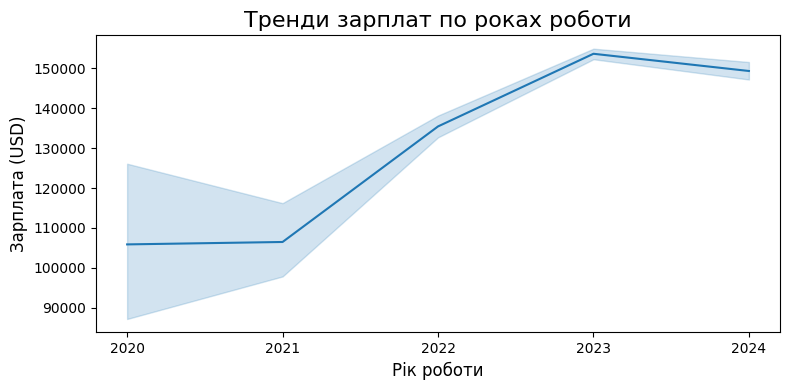

In [28]:
salary_sorted = salary.sort_values(by='work_year')
plt.figure(figsize=(8, 4))
sns.lineplot(x='work_year', y='salary_in_usd', data=salary)
plt.xticks(range(2020, 2025))
plt.title('Тренди зарплат по роках роботи', fontsize=16)
plt.xlabel('Рік роботи', fontsize=12)
plt.ylabel('Зарплата (USD)', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# рівень зарплати зростає з кожним роком, з кожним роком розвивається діджіталізація, росте попит на аналіз даних, для прийняття швидких рішень в бізнесі

Рівень досвіду       | 2022            | 2023            | 2024           
--------------------------------------------------------------------------
Executive            | 191059.08       | 190552.58       | 198529.81       
Senior               | 148206.22       | 165298.44       | 166041.63       
Mid-level            | 104652.44       | 123145.98       | 133955.55       
Entry-level          | 81981.96        | 91928.61        | 97401.57        


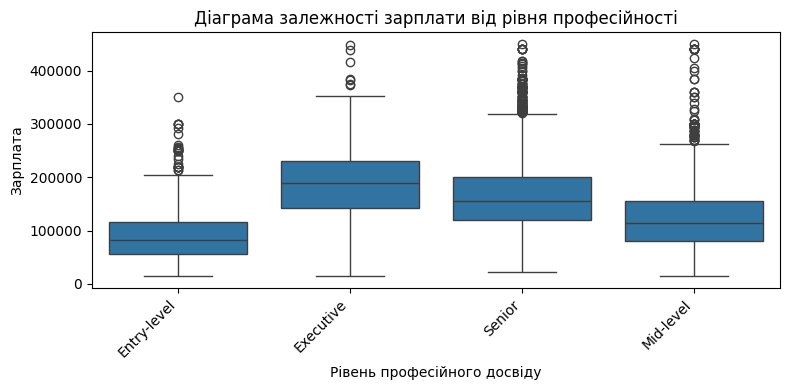

In [67]:
# 2 Аналіз залежності зарплати від професійного рівня
connection = sqlite3.connect('database.db')
cursor = connection.cursor()
query_6 = """
SELECT experience_level,
       AVG(CASE WHEN work_year = 2022 THEN salary_in_usd ELSE NULL END) AS salary_2022,
       AVG(CASE WHEN work_year = 2023 THEN salary_in_usd ELSE NULL END) AS salary_2023,
       AVG(CASE WHEN work_year = 2024 THEN salary_in_usd ELSE NULL END) AS salary_2024
FROM dataset_salary
WHERE salary_in_usd > 0
GROUP BY experience_level
ORDER BY salary_2024 DESC;
"""
cursor.execute(query_6)
header = f"{'Рівень досвіду':<20} | {'2022':<15} | {'2023':<15} | {'2024':<15}"
print(header)
print("-" * len(header))
for row in cursor:
    print(f"{row[0]:<20} | {row[1]:<15.2f} | {row[2]:<15.2f} | {row[3]:<15.2f} ")
plt.figure(figsize=(8, 4))
sns.boxplot(data=salary, x='experience_level', y='salary')
plt.xlabel('Рівень професійного досвіду')
plt.ylabel('Зарплата')
plt.title('Діаграма залежності зарплати від рівня професійності')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
connection.close()

In [ ]:
# Середня зарплата для Executive (керівників) значно вища, тому що високий рівень відповідальності, більший досвід і кваліфікація, відмінними лідерськими якостями та спеціалізованими навичками.
# Їхня зарплата відображає цей рівень майстерності.У наборі даних може бути менша кількість представників рівня Executive (керівники) порівняно з іншими рівнями, такими як Entry-level чи Mid-level,
# Через це навіть кілька високих зарплат можуть значно підняти середнє значення. Керівники часто отримують не лише зарплату, а й додаткові бонуси, опціони на акції та інші привілеї, які входять
# у загальний підрахунок зарплати. Також можна зробити висновки що рівень зарплат всіх рівнів зростають з кожним роком.

In [70]:
# Топ 5 країн з найвищим рівнем зарплат для Entry-level (джуниіора)
connection = sqlite3.connect('database.db')
cursor = connection.cursor()
query_7 = """
SELECT employee_residence, AVG(salary_in_usd) AS avg_salary_in_usd
FROM dataset_salary
WHERE experience_level = 'Entry-level' AND work_year IN (2023, 2024)
GROUP BY employee_residence
HAVING COUNT(*) > 5
ORDER BY avg_salary_in_usd DESC
LIMIT 5;
"""
cursor.execute(query_7)
print("Країна проживання | Середня зарплата (USD)")
print("-" * 40)
for row in cursor:
    print(f"{row[0]:<20} | {row[1]:.2f}")
cursor.close()
connection.close()

Країна проживання | Середня зарплата (USD)
----------------------------------------
United States        | 103863.18
Canada               | 88186.05
Australia            | 75544.67
Germany              | 74323.64
United Kingdom       | 56625.40


In [ ]:
# Очолює рейтинг США та Канада, це може бути обумовлено високим рівнем життя, великою кількістю вакансій та сильним попитом на молодих спеціалістів у високотехнологічних галузях.
# Рівень розвитку технологій та рівень життя в цих країнах вищий, тому і зарплати вищі. В США, Канаді та Австралії попит на Junior-фахівців може бути вищим, особливо в сферах IT та інженерії.

In [54]:
# аналіз середньої зарплати від категорії роботи
connection = sqlite3.connect('database.db')
cursor = connection.cursor()
query_8 = """
SELECT job_category, AVG(salary_in_usd) AS avg_salary_usd
FROM dataset_salary
WHERE company_size = 'M'
GROUP BY job_category
ORDER BY avg_salary_usd DESC;
"""
cursor.execute(query_8)
print(f"{'Категорія работи':<35} | {'Середня зарплата (USD)':>20}")
print("-" * 60)
for row in cursor:
    print(f"{row[0]:<35} | {row[1]:>20.2f}")
cursor.close()
connection.close()

Категория работы                    | Средняя зарплата (USD)
------------------------------------------------------------
Machine Learning and AI             |            187309.29
Data Science and Research           |            163436.74
Data Architecture and Modeling      |            155478.25
Data Engineering                    |            147792.64
Leadership and Management           |            142612.44
Cloud and Database                  |            140100.00
BI and Visualization                |            124028.14
Data Analysis                       |            108039.97
Data Quality and Operations         |             97224.38
Data Management and Strategy        |             91346.19


In [ ]:
# найбільший рівень заробітної плати в категорії Machine Learning and AI та Data Science

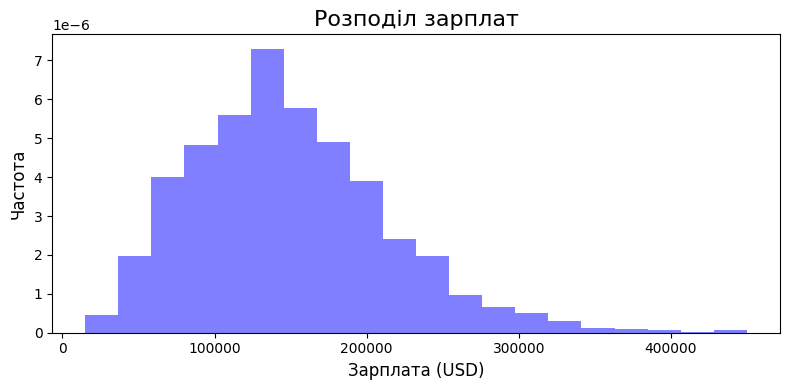

In [31]:
# аналіз розподілу зарплат
plt.figure(figsize=(8, 4))
plt.hist(salary['salary_in_usd'], bins=20, density=True, alpha=0.5, color='blue')
plt.xlabel("Зарплата (USD)", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.title("Розподіл зарплат", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# гістограма показує, як розподіляються зарплати в наборі даних - найбільша кількість зарплат на рівні 150000 долл

<ipython-input-72-d33205458baf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='company_location', y='count', data=top_10_locations, palette='pastel')


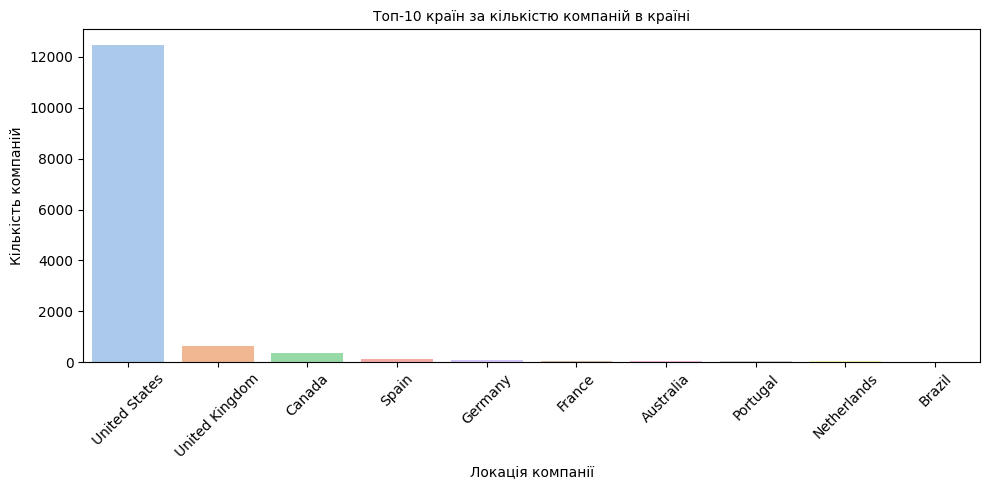

In [72]:
# 3 Аналіз зарплат від місцеположенням компаній, проживання робітників
# топ 10 країн за кількістью компаній в країні
top_10_locations = salary['company_location'].value_counts().head(10).reset_index()
top_10_locations.columns = ['company_location', 'count']
plt.figure(figsize=(10, 5))
sns.barplot(x='company_location', y='count', data=top_10_locations, palette='pastel')
plt.title('Топ-10 країн за кількістю компаній в країні', fontsize=10)
plt.xlabel('Локація компанії', fontsize=10)
plt.ylabel('Кількість компаній', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Найбільше компаній знаходиться в США, де дуже розвинений ринок технологій та ІТ, в цій країні знаходятся такі компаніі як Google, Microsoft, Amazon та інші

In [ ]:
print(salary['employee_residence'].value_counts())

employee_residence
United States     12418
United Kingdom      616
Canada              371
Spain               131
Germany              90
                  ...  
Bulgaria              1
Jersey                1
Serbia                1
Hong Kong             1
Luxembourg            1
Name: count, Length: 86, dtype: int64


<ipython-input-104-2fe0bffc0bff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='job_category', y='salary_in_usd', data=avg_salary_by_job_category, palette='coolwarm')


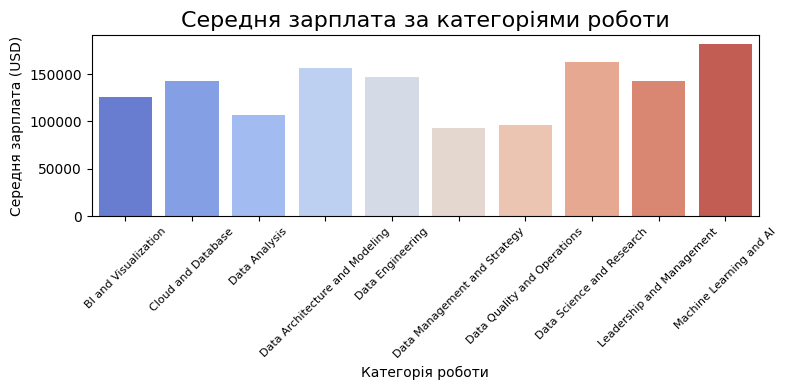

In [ ]:
# 4 Аналіз зарплат по категоріям роботи
avg_salary_by_job_category = salary.groupby('job_category')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='job_category', y='salary_in_usd', data=avg_salary_by_job_category, palette='coolwarm')
plt.title('Середня зарплата за категоріями роботи', fontsize=16)
plt.xlabel('Категорія роботи', fontsize=10)
plt.ylabel('Середня зарплата (USD)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Графік показує, що найвища середня зарплата в категорії Machine Learning and AI

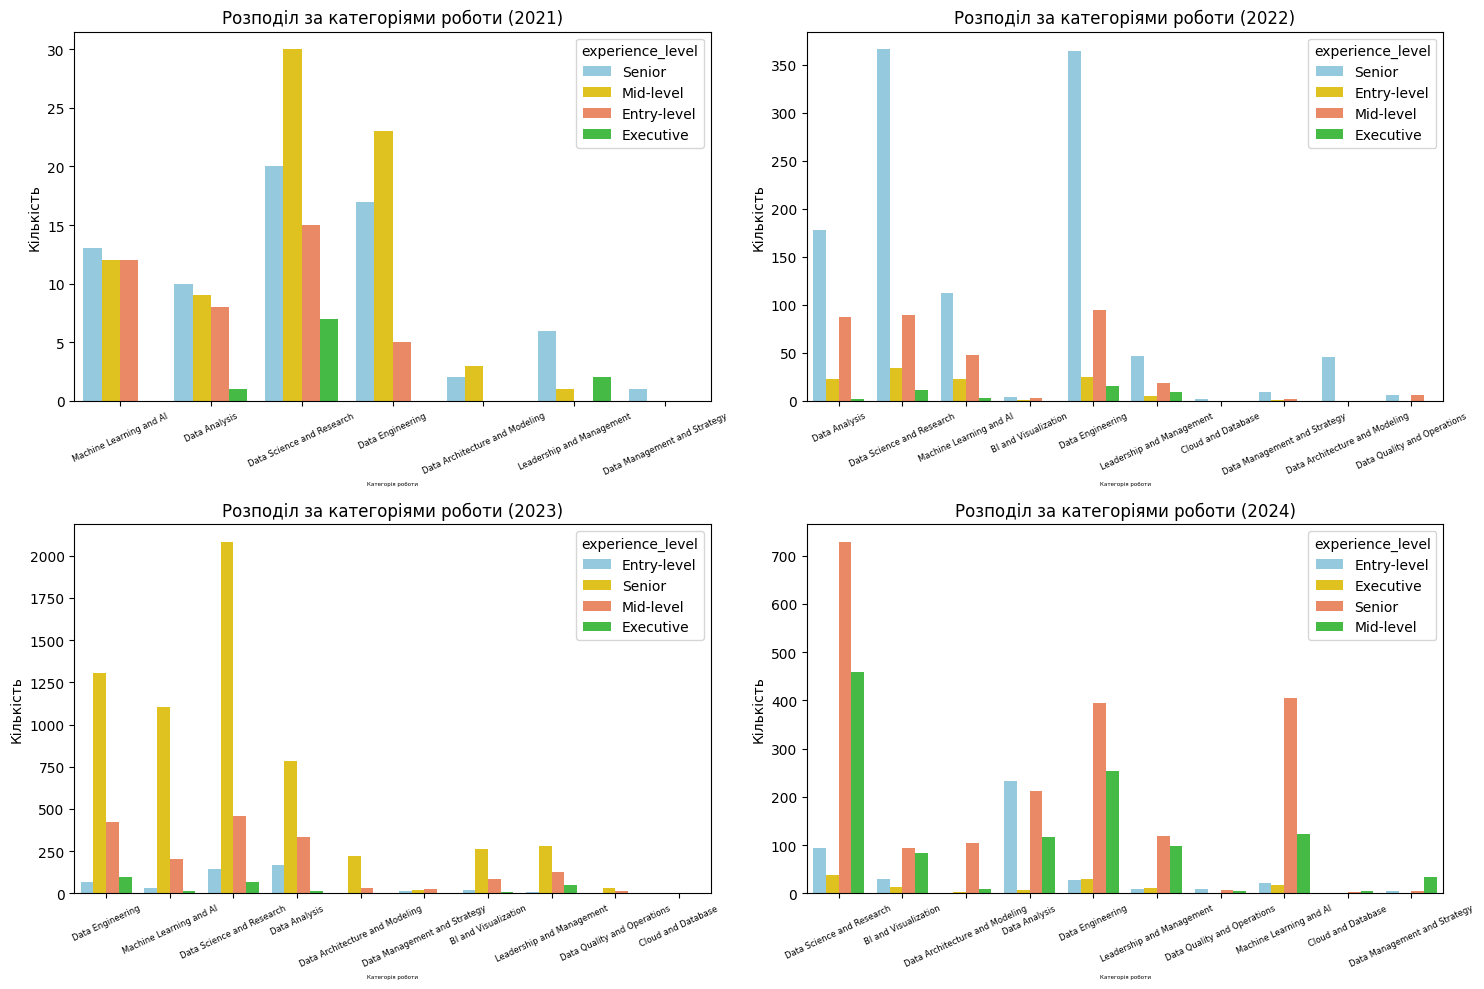

In [ ]:
# Розподіл кількості співробітників по категоріям роботи та рівнем професійності по рокам
experience_level_colors = ["skyblue", "gold", "coral", "limegreen"]
years = [2021, 2022, 2023, 2024]
figure, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
for i, year in enumerate(years):
    data_filtered = salary[salary['work_year'] == year]
    sns.countplot(
      x='job_category',
        hue='experience_level',
        data=data_filtered,
        palette=experience_level_colors,
        ax=axes[i]
    )
    axes[i].set_title(f"Розподіл за категоріями роботи ({year})")
    axes[i].set_xlabel("Категорія роботи", fontsize=4)
    axes[i].set_ylabel("Кількість")
    axes[i].tick_params(axis='x', labelsize=6, rotation=25)
plt.tight_layout()
plt.show()

In [ ]:
# з 2022 року найбільша кількість робітників рівня Senior працю в категоріїї Machine Learning and AI та Data Science, цей рівень зберігається і в 2024 році

In [ ]:
# 5 Аналіз робочого розташування
salary['work_setting'].value_counts().reset_index()

,work_setting,count
0,In-person,9413
1,Remote,4573
2,Hybrid,213


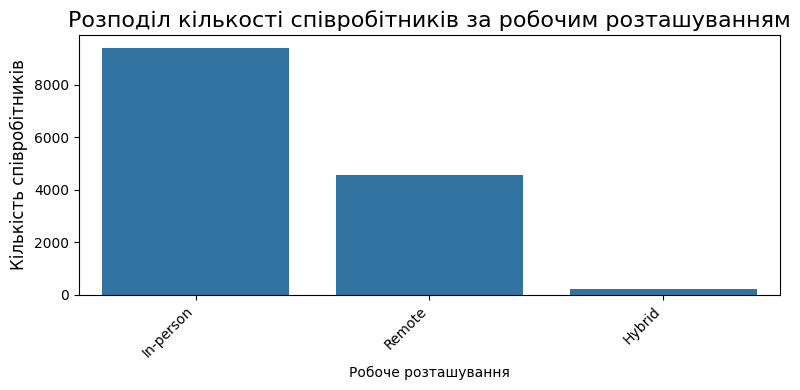

In [80]:
# аналіз розподілу співробітників за робочим розташуванням
plt.figure(figsize=(8, 4))
sns.countplot(data=salary, x='work_setting', order=salary['work_setting'].value_counts().index)
plt.xlabel('Робоче розташування', fontsize=10)
plt.ylabel('Кількість співробітників', fontsize=12)
plt.title('Розподіл кількості співробітників за робочим розташуванням', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# найбільше спеціалісти працють в офісі та віддалено

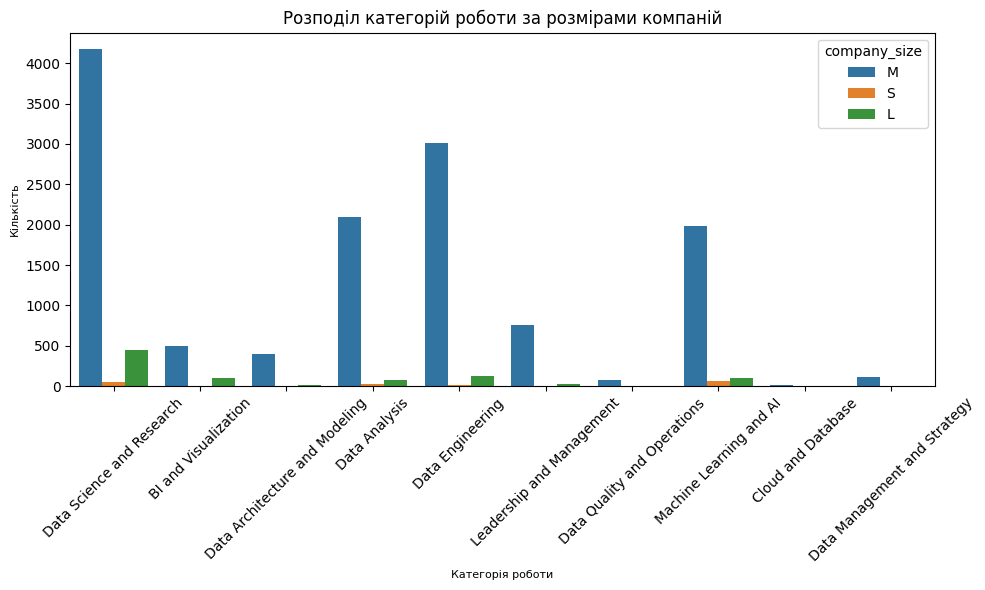

In [ ]:
# 6 Аналіз розміру компаній
# аналіз розподілу категорій роботи за розмірами компаній
plt.figure(figsize=(10, 6))
sns.countplot(x='job_category', data=salary, hue='company_size')
plt.title('Розподіл категорій роботи за розмірами компаній', fontsize=12)
plt.xlabel('Категорія роботи', fontsize=8)
plt.ylabel('Кількість', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# найбільша кількість ІТ-спецілістів працює в середніх компаніях

<ipython-input-60-4a4e51ed67e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_company_size.index, y=avg_salary_company_size.values, palette='inferno')


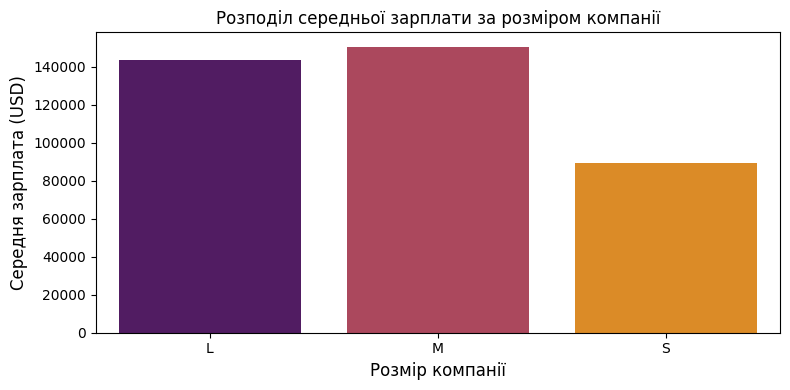

In [60]:
# аналіз розподілу зарплати за розміром компанії
avg_salary_company_size = salary.groupby('company_size')['salary_in_usd'].mean()
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_salary_company_size.index, y=avg_salary_company_size.values, palette='inferno')
plt.title('Розподіл середньої зарплати за розміром компанії', fontsize=12)
plt.xlabel('Розмір компанії', fontsize=12)
plt.ylabel('Середня зарплата (USD)', fontsize=12)
plt.xticks()
plt.tight_layout()
plt.show()

In [ ]:
# найбільша зарплата в середніх компаніях

<ipython-input-150-62c96cfbc3fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employment_salary, x="employment_type", y="salary_in_usd", palette="coolwarm")


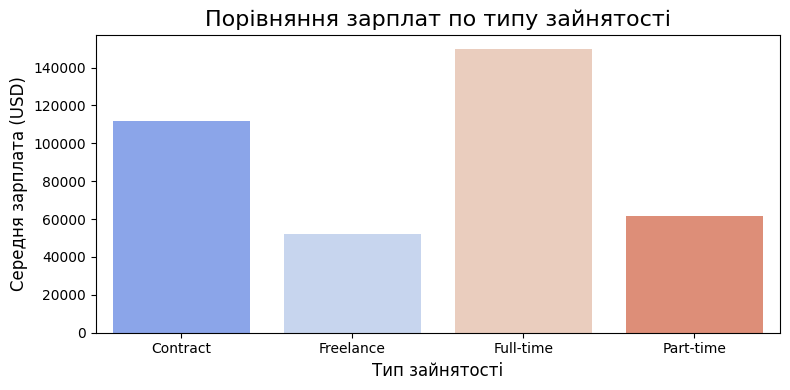

In [ ]:
# 7 Аналіз зарплат по типу зайнятості
employment_salary = salary.groupby("employment_type")["salary_in_usd"].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=employment_salary, x="employment_type", y="salary_in_usd", palette="coolwarm")
plt.title("Порівняння зарплат по типу зайнятості", fontsize=16)
plt.xlabel("Тип зайнятості", fontsize=12)
plt.ylabel("Середня зарплата (USD)", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# найвищі зарплати на повній зайнятості

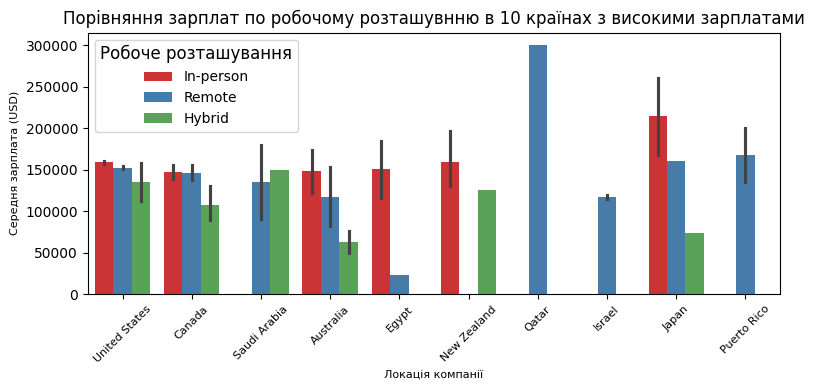

In [78]:
# 8 Аналіз зарплат по робочому розташуванню
top_10_countries_list = salary.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(10).index.tolist()
df_top_10 = salary[salary["company_location"].isin(top_10_countries_list)]
plt.figure(figsize=(8, 4))
sns.barplot(data=df_top_10, x="company_location", y="salary_in_usd", hue="work_setting", palette="Set1")
plt.title("Порівняння зарплат по робочому розташувнню в 10 країнах з високими зарплатами", fontsize=12)
plt.xlabel("Локація компанії", fontsize=8)
plt.ylabel("Середня зарплата (USD)", fontsize=8)
plt.xticks(rotation=45, fontsize=8)
plt.legend(title="Робоче розташування", fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

In [76]:
# Тренд середньої зарплати за роками для кожної категорії посад
# Показує, як змінювалася середня зарплата для посад за роками
pivot_2 = salary.pivot_table(
    values='salary_in_usd',
    index='work_year',
    columns='job_category',
    aggfunc='mean'
)
print(pivot_2)

job_category  BI and Visualization  Cloud and Database  Data Analysis  \
work_year                                                               
2020                           NaN                 NaN   68014.666667   
2021                           NaN                 NaN   87818.500000   
2022                 100875.000000       175000.000000  107220.831034   
2023                 132045.851752       141666.666667  107907.573405   
2024                 116225.696833       132666.666667  105788.605263   

job_category  Data Architecture and Modeling  Data Engineering  \
work_year                                                        
2020                                     NaN      94575.823529   
2021                           169940.600000     107192.288889   
2022                           166091.543478     139629.909820   
2023                           153193.936508     149396.679006   
2024                           158069.008621     148341.130496   

job_category  Data Manage

In [77]:
# Аналіз кількості вакансій із високою зарплатою по країнах
# Країни, де кількість вакансій із зарплатою вища за певний поріг значна
high_salary_job = 100000
pivot_3 = salary[salary['salary_in_usd'] > high_salary_job].pivot_table(
    values='job_title',
    index='employee_residence',
    aggfunc='count'
)
pivot_3_sorted = pivot_3.sort_values(by='job_title', ascending=False)
print(pivot_3_sorted)

                        job_title
employee_residence               
United States               10103
Canada                        282
United Kingdom                215
Germany                        28
Australia                      26
France                         12
Spain                           9
Egypt                           7
New Zealand                     6
Ukraine                         5
Switzerland                     5
Puerto Rico                     5
Poland                          5
India                           5
Netherlands                     4
Ireland                         4
Lithuania                       3
Mexico                          3
Brazil                          3
Colombia                        3
Portugal                        2
Saudi Arabia                    2
United Arab Emirates            2
Japan                           2
Italy                           1
Sweden                          1
Chile                           1
China         

In [63]:
# T-тест (порівняння вибірки з відомим середнім значенням
# перевірки гіпотези про те, що середня зарплата джуніорів дорівнює $70,000
junior_salaries = salary[salary['experience_level'] == 'Entry-level']['salary_in_usd']
t_stat, p_value = ttest_1samp(junior_salaries, 70000)
print(f"T-статистика: {t_stat}, P-значение: {p_value}")

T-статистика: 14.76299197076051, P-значение: 5.3039100503936877e-45


In [ ]:
# T-статистика: 14.76 — показує, що різниця між середньою зарплатою джуніорів і припустимим значенням (70,000 USD) є дуже значною.
# P-значення: 5.30e-45 — значно менше стандартного рівня значущості 0.05, що вказує на те, що результат статистично значущий.
# Є вагомі докази того, що середня зарплата джуніорів суттєво відрізняється від 70,000 USD. Зважаючи на позитивну величину T-статистики, можна припустити,
# що середня зарплата джуніорів перевищує 70,000 USD.
# Цей результат є вкрай малоймовірним випадковістю і підтверджує гіпотезу про відмінність середнього значення.

In [64]:
salary[['work_year', 'salary_in_usd']].corr()

,work_year,salary_in_usd
work_year,1.000000,0.077343
salary_in_usd,0.077343,1.000000


In [66]:
# Кореляція між роком та зарплатою:
# Дослідження впливу часу роботи на рівень зарплати:
# Кореляційна матриця оцінює ступінь зв'язку між змінними.
# Кореляція work_year з wwork_year : Значення 1.000000 показує ідеальну кореляцію змінної із собою
# Кореляція work_year з salary_in_usd - Значення 0.077343 вказує на слабку позитивну кореляцію між роком роботи та зарплатою. Це означає, що зростання року роботи пов'язане з невеликим збільшенням зарплати,
# але зв'язок дуже слабкий
# Кореляція salary_in_usd з salary_in_usd - начення 1.000000 показує ідеальну кореляцію зарплати із самою собою
# Рік роботи практично не впливає на зарплату, оскільки кореляція між цими змінними близька до нуля. Можливо, на зарплату більше впливають інші чинники, як-от досвід, категорія роботи або розмір компанії.

In [ ]:
#    Загальний висновок
# Спостерігається суттєвий зв'язок між рівнем досвіду працівника та середньою зарплатою.
# Найвищі показники мають керівники (Executive) завдяки великій відповідальності, стратегічній ролі та додатковим бонусам.
# Початковий рівень (Entry-level) пропонує конкурентну зарплату, але її потенціал значно нижчий порівняно з Mid-level та Senior.
# Максимальні зарплати в Senior та Mid-level схожі, що може свідчити про обмеження для подальшого зростання.
# Зростання середньої зарплати за період з 2020 по 2023 рік демонструє позитивну тенденцію, що досягнула піку у 2023 році.
# Незначне зниження у 2024 році (-2.8%) може сигналізувати про стабілізацію ринку праці або вплив економічних чинників.
# Найвищі зарплати спостерігаються в категорії Machine Learning and AI, а також Data Science and Research, що вказує на високу затребуваність і складність цих спеціалізацій.
# Найнижча середня зарплата у категорії Data Management and Strategy, що свідчить про менший попит або простішу природу завдань.
# Середні компанії демонструють найвищу середню зарплату, ймовірно, завдяки збалансуванню бюджету та залученню кваліфікованих фахівців.
# США очолюють список за кількістю компаній і зарплатами, що логічно через розвинений технологічний сектор.
# Для рівня Entry-level найкращі зарплати пропонують США та Канада, що може бути пов'язано з високим попитом на молодих спеціалістів у цих країнах.
#    РекомендаціЇ
#    Працівникам - початківцям рекомендується звертати увагу на країни з високими зарплатами, такі як США, Канада або Австралія, якщо планується міграція чи пошук віддаленої роботи.
# Фахівцям, які прагнуть максимального заробітку, варто орієнтуватися на спеціалізації Machine Learning and AI або Data Science.
#    Роботодавцям - Середнім компаніям слід інвестувати в залучення топових фахівців, щоб підтримувати конкурентоспроможність.
#    Для розвитку молодих талантів важливо пропонувати конкурентні зарплати на рівні Entry-level і інвестувати в їх навчання та розвиток.
# Для підтримки тенденції зростання зарплат слід враховувати такі фактори, як розвиток технологій, підтримка високого попиту на кваліфіковані кадри та адаптація до економічних змін.
#    Рекомендується дослідити вплив інфляції, глобальних економічних тенденцій та змін у попиті на спеціалістів для прогнозування зарплат на майбутні періоди